In [1]:
from skimage.segmentation import felzenszwalb
import cv2,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'C:\\Users\\MASOUD\\Pictures\\cars\\drone.jpg'

In [3]:
# Step 1: Read the image
image = cv2.imread(path)

# Step 2: Convert to CIELAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Step 3: Split the LAB image into L, A, and B channels
L, A, B = cv2.split(lab_image)

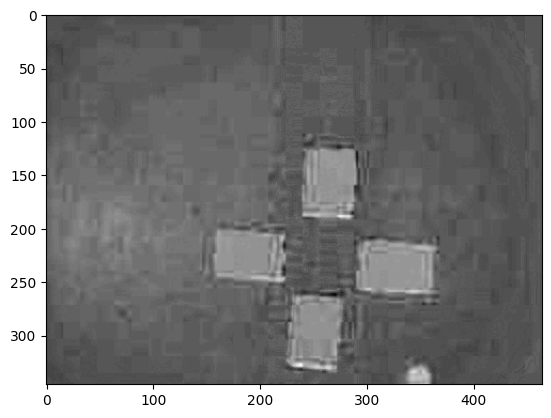

In [4]:
plt.imshow(A,cmap='gray')

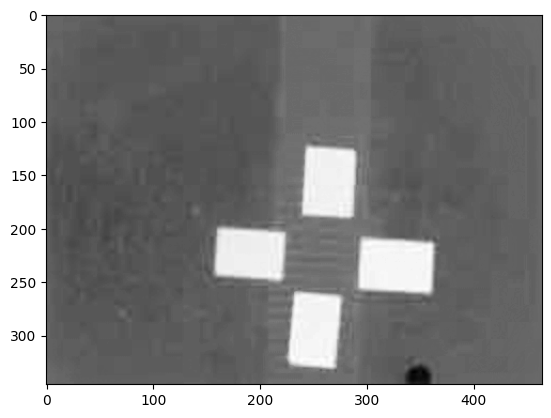

In [5]:
plt.imshow(B,cmap='gray')

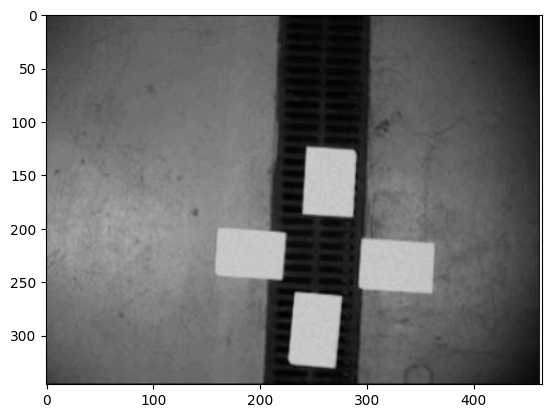

In [6]:
plt.imshow(L,cmap='gray')

In [8]:
ab = np.stack((A.flatten(),B.flatten()),axis=-1)
kmeans = cv2.kmeans(ab.astype(np.float32), 2, None, 
                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 10, 
                    cv2.KMEANS_RANDOM_CENTERS)[1]


In [9]:
labels = kmeans.reshape(A.shape)

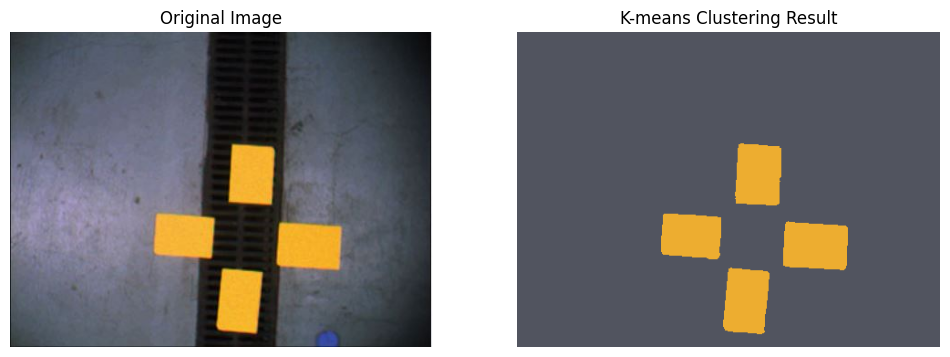

In [10]:
# Create an output image to visualize the clusters
output_image = np.zeros_like(image)
for i in range(2):
    output_image[labels == i] = np.mean(image[labels == i], axis=0)

# Display the original and clustered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('K-means Clustering Result')
plt.axis('off')

plt.show()

In [7]:
one = np.array([1,2])
two = np.array([3,4])
np.stack((one,two),axis=-1)

array([[1, 3],
       [2, 4]])